In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os
%matplotlib inline

In [25]:
os.chdir("C:/Users/Elijah/Downloads/code-answers-scores-python/Results")
allData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    allData = pd.concat([allData, file])

In [26]:
allData

,Unnamed: 0,Year,Semester,Quiz/Exam,Student ID,Coding Problem,Earned Score,Maximum Score,Distance,Distance Z-score
0,0,2013,spring,quiz4,s111f453,BodyType,4,5,24.862069,2.369913e+00
1,1,2013,spring,quiz4,s18f746e0,BodyType,5,5,12.137931,-1.075291e+00
2,2,2013,spring,quiz4,s23f81012,BodyType,5,5,21.155172,1.366229e+00
3,3,2013,spring,quiz4,s27774cef,BodyType,5,5,16.810345,1.898177e-01
4,4,2013,spring,quiz4,s29d1098c,BodyType,4,5,19.344828,8.760574e-01
...,...,...,...,...,...,...,...,...,...,...
1,1,2013,spring,quiz9w,s564281ce,Younger,1,5,21.000000,2.468070e-01
2,2,2013,spring,quiz9w,s70c07b9e,Younger,1,5,20.800000,1.234035e-01
3,3,2013,spring,quiz9w,sc2ea6ca8,Younger,0,5,23.600000,1.851053e+00
4,4,2013,spring,quiz9w,sc6713607,Younger,5,5,19.000000,-9.872281e-01


In [27]:
allData2 = allData.drop(allData.columns[0], axis=1)

In [28]:
allData2.dtypes

Year                  int64
Semester             object
Quiz/Exam            object
Student ID           object
Coding Problem       object
Earned Score          int64
Maximum Score         int64
Distance            float64
Distance Z-score    float64
dtype: object

In [7]:
# This line of code is only to export all data we have 
# allData2.to_csv("allStudentProgramsDataWith0Score.csv", index=False)

In [29]:
students_mean = allData2.groupby("Student ID").mean()

In [30]:
zscore = students_mean.loc[:, ['Distance Z-score']]

In [31]:
students_sum = allData2.groupby("Student ID").sum()

In [32]:
grades = students_sum.loc[:, ['Earned Score', 'Maximum Score']]

In [33]:
students = zscore.join(grades)

In [34]:
students["Overall Percent"] = students['Earned Score'] / students['Maximum Score']

In [35]:
students

,Distance Z-score,Earned Score,Maximum Score,Overall Percent
Student ID,,,,
s111f453,0.279357,71,88,0.806818
s185bfebd,0.089652,63,105,0.600000
s189f9c70,0.018496,36,54,0.666667
s18f746e0,-0.444384,79,95,0.831579
s1a555e8d,-0.217776,68,113,0.601770
...,...,...,...,...
sfbb08d7,-0.026357,13,14,0.928571
sfc3bcc7d,0.133080,110,140,0.785714
sfe2341ab,-0.508778,80,99,0.808081


In [15]:
# students.to_csv("allStudentDataIncluding0Score.csv", index=False)

In [36]:
students['Distance Z-score'].corr(students['Overall Percent'],method='pearson')

-0.4309819139346733

In [37]:
pearsonr(students['Distance Z-score'], students['Overall Percent'])

(-0.43098191393467344, 1.2774294515383252e-08)

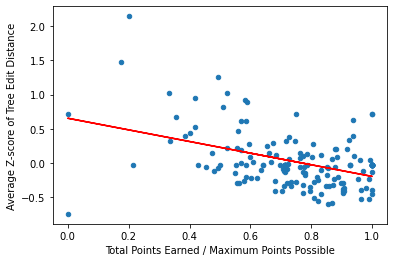

In [50]:
x = students['Overall Percent']
y = students['Distance Z-score']
students.plot(x='Overall Percent', y='Distance Z-score', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.plot(x, m*x+b, color='red')
plt.savefig('C:/Users/Elijah/Documents/GitHub/py-code-to-ast/Data Analysis/graphs/py-all_distance_vs_perf.png')

## Comparing student average Z-score from full point implementations to student's overall performance in quizzes

In [2]:
os.chdir("C:/Users/Elijah/Desktop/pythonResults/pythonResults")
fullScoreData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    fullScoreData = pd.concat([fullScoreData, file])

In [3]:
fullScoreData2 = fullScoreData.drop(fullScoreData.columns[0], axis=1)

In [20]:
os.chdir("C:/Users/Elijah/Documents/GitHub/py-code-to-ast/Data Analysis")
fullScoreData2.to_csv("fullScoreProgramData.csv", index=False)

In [21]:
f_students_mean = fullScoreData.groupby("Student ID").mean()

In [22]:
f_zscore = f_students_mean.loc[:, ['Distance Z-score']]

In [23]:
f_zscore.rename({'Distance Z-score': 'Z-score of 100% Submissions'}, axis=1, inplace=True)

In [39]:
f_students = students.join(f_zscore)

In [40]:
f_students_final = f_students.dropna(subset=['Z-score of 100% Submissions'])

In [41]:
f_students_final

,Distance Z-score,Earned Score,Maximum Score,Overall Percent,Z-score of 100% Submissions
Student ID,,,,,
s111f453,0.279357,71,88,0.806818,-0.503281
s185bfebd,0.089652,63,105,0.600000,0.025944
s189f9c70,0.018496,36,54,0.666667,0.364356
s18f746e0,-0.444384,79,95,0.831579,-0.223750
s1a555e8d,-0.217776,68,113,0.601770,-0.357871
...,...,...,...,...,...
sfbb08d7,-0.026357,13,14,0.928571,0.004132
sfc3bcc7d,0.133080,110,140,0.785714,0.230893
sfe2341ab,-0.508778,80,99,0.808081,-0.503328


In [42]:
os.chdir("C:/Users/Elijah/Documents/GitHub/py-code-to-ast/Data Analysis")
f_students_final.to_csv("allStudentData.csv", index=False)

In [44]:
pearsonr(f_students_final['Z-score of 100% Submissions'], f_students_final['Overall Percent'])

(-0.03638137264436063, 0.6584907244325531)

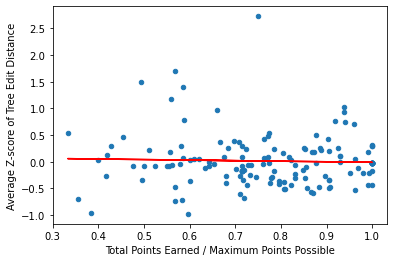

In [49]:
x = f_students_final['Overall Percent']
y = f_students_final['Z-score of 100% Submissions']
f_students_final.plot(x='Overall Percent', y='Z-score of 100% Submissions', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.savefig('C:/Users/Elijah/Documents/GitHub/py-code-to-ast/Data Analysis/graphs/py-full_score_distance_vs_perf.png')

### Pearson Correlation of Avg. Z-score of Correct Solutions vs Overall Quiz Performance of 25-75 Quartile Student Data

In [3]:
quart_data = pd.read_csv("25-75QuartileStudentData.csv")

In [48]:
x = quart_data['Quiz Performance']
y = quart_data['Distance Z-score']
quart_data.plot(x='Quiz Performance', y='Distance Z-score', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/py-full_vs_perf_quartile.png')

NameError: name 'quart_data' is not defined

In [7]:
pearsonr(quart_data['Distance Z-score'], quart_data['Quiz Performance'])

(-0.05036675940698827, 0.27026391429325236)

### Pearson Correlation for 0-25 and 75-100 Quartile Student Data

In [2]:
low_quart = pd.read_csv("0-25QuartileStudentData.csv")
high_quart = pd.read_csv("75-100QuartileStudentData.csv")

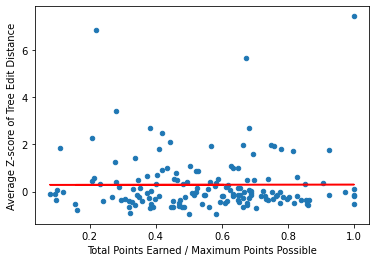

In [3]:
x = low_quart['Quiz Performance']
y = low_quart['Distance Z-score']
low_quart.plot(x='Quiz Performance', y='Distance Z-score', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/0-25QuartilePearson.png')

In [5]:
pearsonr(low_quart['Distance Z-score'], low_quart['Quiz Performance'])

(0.001393813144517017, 0.9862222409427338)

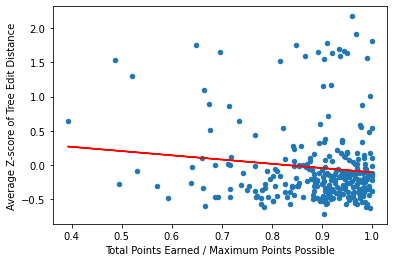

In [4]:
x = high_quart['Quiz Performance']
y = high_quart['Distance Z-score']
high_quart.plot(x='Quiz Performance', y='Distance Z-score', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/75-100QuartilePearson.png')

In [6]:
pearsonr(high_quart['Distance Z-score'], high_quart['Quiz Performance'])

(-0.11487944785440184, 0.05573125837781127)